# Regression in Python

We will now go over how to do OLS in Python. 
As before the first step will be to load the relevant packages and open the file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats

os.chdir('c:/Users/arpie71/Dropbox/Columbia/workshop/data')
trade76 = pd.read_csv('trade76.csv', delimiter=',')
print(type(trade76))
print(len(trade76))

<class 'pandas.core.frame.DataFrame'>
169


# First look at the data
We will first look at the first 5 rows of the data and then summarize a couple of variables.

In [2]:
print(trade76.head(n=5))
print(np.mean(trade76.lnX.astype(float)))
print(np.mean(trade76.lnpromote.astype(float)))
print(np.ptp(trade76.lnpromote.astype(float)))
print(trade76.bpro.value_counts())
print("Table of GATT membership\n",trade76.gatt_d.value_counts())
print(trade76.describe())
print(trade76.lndistw.describe())



   year  bdis  bexp  bpro  btio  ecsm  eewt  estc  etrd  ettc       ...        \
0  1976     0     0     0     0     0     0     0     0     0       ...         
1  1976     0     0     0     0     0     0     0     0     0       ...         
2  1976     6   108    13    10     0    25    46   829     0       ...         
3  1976     0     1     1     0     0     0     2    13     0       ...         
4  1976     0    14     2     1     0     0     5    10     0       ...         

   contig  comlang_off  col45  gatt_d   lndistw        lnX        lnM  \
0     0.0          0.0    0.0     0.0  8.360339   1.386294   2.079442   
1     0.0          0.0    0.0     0.0  8.732820        NaN        NaN   
2     1.0          1.0    0.0     1.0  7.640266  10.090341  10.224375   
3     0.0          1.0    0.0     0.0  7.913258   4.369448   1.386294   
4     0.0          1.0    0.0     0.0  7.778533   5.293305   6.556778   

       lngdp  lnpromote  lntradepromcab  
0   5.483881   0.000000       -4

# Graph
We saw this figure earlier but it was done in R.
This is done in Python. 
We are just plotting Exports and Trade promotion. 

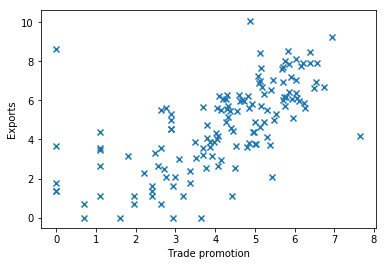

In [3]:
plt.xlabel("Trade promotion")
plt.ylabel("Exports")
plt.scatter(trade76['lnpromote'],trade76['lnX'],marker='x')
plt.show()

# Regression code
Now we get to the actual regression code. 
Different ways to do regression in Python. 
Statsmodels seems to be preferred way now. 
Syntax is very much like R. 

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Y = trade76['lnX']
#X=trade76[['lnpromote','lngdp']]
#mod2 = sm.OLS(Y,X, hasconst=0).fit()
model = smf.glm('lnX~lnpromote+ contig+comlang_off + col45+gatt_d+lndistw + lngdp', data = trade76).fit()
# Print out the statistics

model.summary()
#mod2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    lnX   No. Observations:                  130
Model:                            GLM   Df Residuals:                      122
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:              0.8675750483597361
Method:                          IRLS   Log-Likelihood:                -171.10
Date:                Tue, 22 May 2018   Deviance:                       105.84
Time:                        16:58:59   Pearson chi2:                     106.
No. Iterations:                     2                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       9.5469      1.691      5.646      0.000       6.233      12.861
lnpromote       0.2939      0.068      4.295      0.000       0.160       0.428
contig         -0.5200      0.738     -0.704      0.481      -1.967       0.927
comlang_off     0.6209      0.192      3.232      0.001       0.244       0.997
col45           0.8367      0.960      0.871      0.384      -1.046       2.719
gatt_d         -0.0984      0.176     -0.561      0.575      -0.442       0.246
lndistw        -1.4551      0.187     -7.796      0.000      -1.821      -1.089
lngdp           0.8192      0.058     14.048      0.000       0.705       0.934
===============================================================================
"""

# Summary statistics
Now we can view some summary statistics.
Like R, Python stores the predicted values and residuals so we do not need to calculate them ourselves.
Also, here Python is using an maximum likelihood estimation

In [5]:

ypred=model.predict()
print(ypred[1:5])
print(model.fittedvalues[1:5])
print(trade76.lnX[1:5])
#yres=model.residual()
dir(model)
print(model.resid_working[1:5])
print(trade76.lnX[1:5]-model.fittedvalues[1:5])

[9.8921335  3.85597283 4.99495948 4.11353813]
2    9.892134
3    3.855973
4    4.994959
6    4.113538
dtype: float64
1          NaN
2    10.090341
3     4.369448
4     5.293305
Name: lnX, dtype: float64
2    0.198207
3    0.513475
4    0.298345
6    0.897097
dtype: float64
1         NaN
2    0.198207
3    0.513475
4    0.298345
6         NaN
dtype: float64


# Logit
Finally we can run a couple of logit models
Neither fit of the model we run is that good. 
But we are just using Python to play around. 
The first model we run on the full sample to see if anything influences GATT membership.
None of these variables shold. 

In [6]:
logit1 = smf.glm('gatt_d~lnpromote+ lndistw + lngdp', data=trade76, family=sm.families.Binomial()).fit()
print(logit1.summary())
print(dir(logit1))
print(logit1.predict()[1:5])
print(logit1.fittedvalues[1:5])
print(logit1.fit_history)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 gatt_d   No. Observations:                  145
Model:                            GLM   Df Residuals:                      141
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -91.442
Date:                Tue, 22 May 2018   Deviance:                       182.88
Time:                        16:58:59   Pearson chi2:                     144.
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6099      3.463     -1.042      0.297     -10.397       3.177
lnpromote     -0.0587      0.146     -0.403      0.6

# Prediction
Now we will run the model only on the first 100 observations and then get the predicted probability. 
We can use this to see how well we predict out of sample.

In [7]:
logit2 = smf.glm('gatt_d~lnpromote+  lngdp+lnX', data=trade76[1:100], family=sm.families.Binomial()).fit()
logit2.summary()
oos = logit2.predict(trade76)
print("The mean predicted probability is", oos.mean(), "\n")
print("The minimum predicted probability is", oos.min(), "\n")
ooscomp = pd.concat([trade76['gatt_d'],oos],1, names=["gatt","oos"])
print(ooscomp[101:110])

The mean predicted probability is 0.7264193851105184 

The minimum predicted probability is 0.4032396763723633 

     gatt_d         0
101     0.0  0.829161
102     0.0  0.736877
103     1.0  0.769897
104     1.0  0.725456
105     0.0  0.595249
106     0.0  0.670451
107     0.0  0.748375
108     0.0  0.856034
109     0.0       NaN


# Minimum value of prediction
We can see whether the minimum predicted value correctly predicted the country as not in the GATT.

In [8]:
trade76['oos']=oos
print(trade76['oos'].min())
print(trade76[['gatt_d','oos']].loc[trade76['oos'].idxmin()])
trade76[['gatt_d','oos']][trade76['oos']<.5]

0.4032396763723633
gatt_d    0.00000
oos       0.40324
Name: 130, dtype: float64


,gatt_d,oos
4,0.0,0.459642
10,1.0,0.495357
19,0.0,0.424109
21,0.0,0.428232
27,1.0,0.473827
28,0.0,0.492307
82,0.0,0.441925
130,0.0,0.403240
